In [ ]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt

In [ ]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [ ]:
stocks = px.data.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

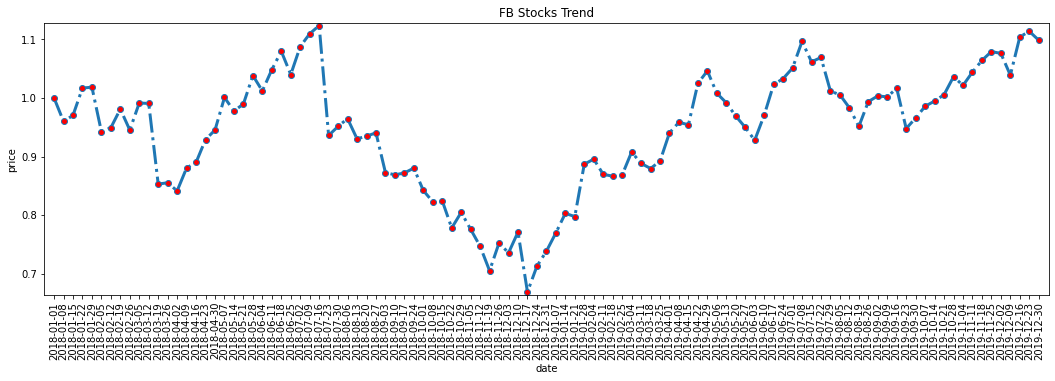

In [ ]:
x=stocks['date']
y=stocks['FB']
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(x, y, linestyle='dashdot', linewidth=3, marker='o', markerfacecolor='r')
ax.set_title('FB Stocks Trend')
ax.set_xlabel('date')
ax.set_ylabel('price')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.margins(0.01)
plt.show()




## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

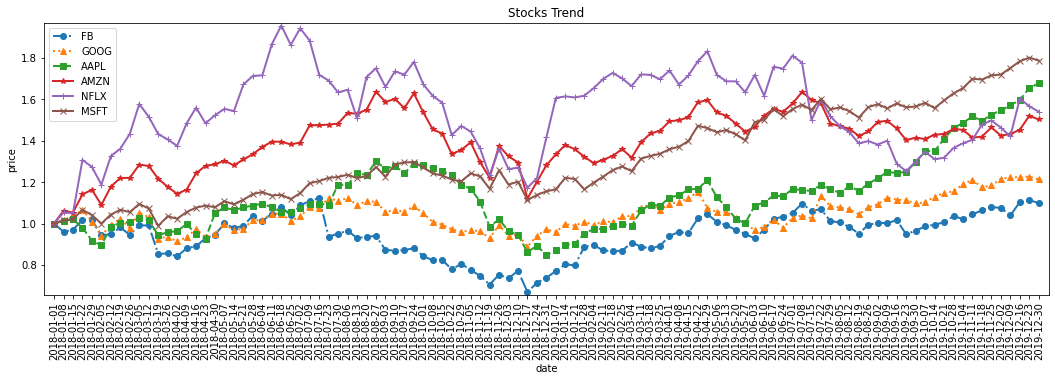

In [ ]:
x=stocks['date']
y=stocks['FB']
y1=stocks['GOOG']
y2=stocks['AAPL']
y3=stocks['AMZN']
y4=stocks['NFLX']
y5=stocks['MSFT']

fig, ax = plt.subplots(figsize=(18, 5))
FB = ax.plot(x, y, linestyle='dashdot', linewidth=2, marker='o', label= 'FB')
GOOG = ax.plot(x, y1, linestyle='dotted', linewidth=2, marker='^', label = 'GOOG')
AAPL = ax.plot(x, y2, linestyle='dashed', linewidth=2, marker='s', label = 'AAPL')
AMZN = ax.plot(x, y3, linestyle='solid', linewidth=2, marker='*', label = 'AMZN')
NFLX = ax.plot(x, y4, linestyle='solid', linewidth=2, marker='+', label = 'NFLX')
MSFT = ax.plot(x, y5, linestyle='solid', linewidth=2, marker='x', label = 'MSFT')
ax.legend()

ax.set_title('Stocks Trend')
ax.set_xlabel('date')
ax.set_ylabel('price')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.margins(0.01)

plt.show()


# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some possible questions:
- Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

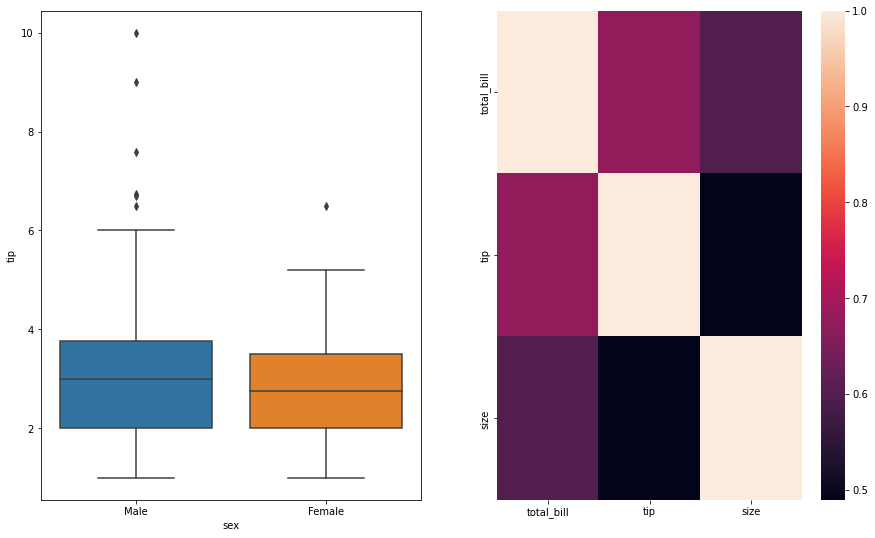

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,9))
# Are there differences between male and female when it comes to giving tips?
ax=sns.boxplot(x='sex', y='tip', data=tips, ax=ax[0])

# What attribute correlate the most with tip?
sns.heatmap(tips.corr())
plt.show()

# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.

### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

In [ ]:
fig = px.line(stocks, x='date',y=stocks.columns[1:7])
fig.show(renderer="colab")


### The tips dataset

In [ ]:
df = px.data.tips() 
fig = px.histogram(df, x="tip", y="total_bill", color='sex')
fig.show(renderer="colab")

## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [ ]:
#load data
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
df_2007 = df.query('year==2007')
df_2007_new= df_2007.groupby('continent').sum()
fig = px.bar(df_2007_new, x='pop', y=df_2007_new.index, 
             color=df_2007_new.index, orientation ='h', text_auto=True)
fig.show(renderer='colab')
